In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
wine = datasets.load_wine()

In [3]:
X_train = wine['data']
y_train = wine['target']

### Linear Discriminative Analysis

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

### Quadratic Discriminant Analysis

In [7]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

### Naive Bayes

In [8]:
from sklearn.naive_bayes import MultinomialNB
naive_model = MultinomialNB()
naive_model.fit(X_train, y_train)

MultinomialNB()

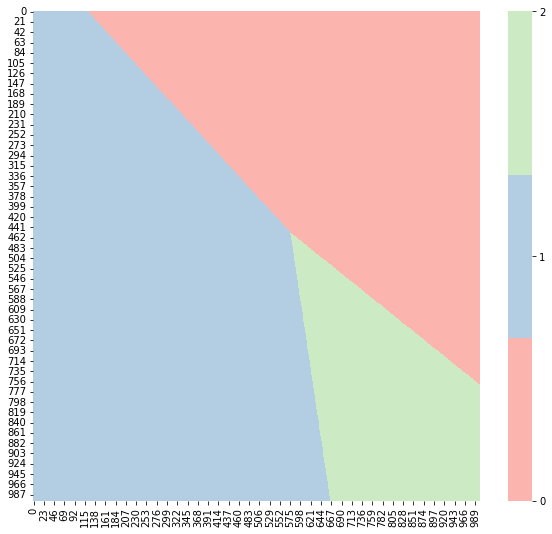

In [11]:
def graph_boundaries(X, model, model_title, n0=1000, n1=1000, figsize=(10, 9), label_every=4):
    d0_range = np.linspace(X[:,0].min(), X[:,0].max(), n0)
    d1_range = np.linspace(X[:,1].min(), X[:,1].max(), n1)
    x_plot = np.array(np.meshgrid(d0_range, d1_range)).T.reshape(-1, 2)
    y_plot = model.predict(x_plot).astype(int)
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(y_plot.reshape(n0, n1).T, cmap=sns.color_palette('Pastel1',3),
               cbar_kws = {'ticks': sorted(np.unique(y_plot))})
    xticks = ax.get_xticks()
    yticks = ax.get_yticks()

x_2d = X_train.copy()[:,2:4]
lda.fit(x_2d, y_train)
graph_boundaries(x_2d, lda, 'LDA')

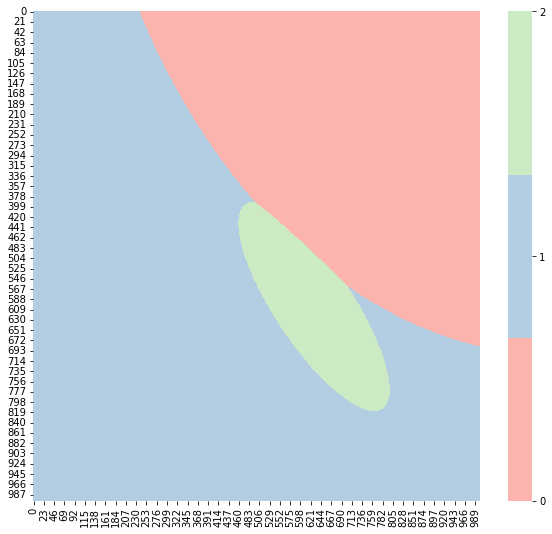

In [14]:
qda_2d = QuadraticDiscriminantAnalysis()
qda_2d.fit(x_2d, y_train)
graph_boundaries(x_2d, qda_2d, 'QDA')

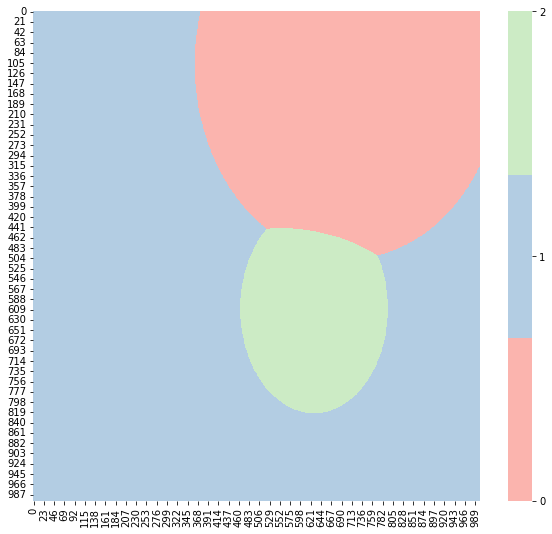

In [16]:
from sklearn.naive_bayes import GaussianNB
nb_2d = GaussianNB()
nb_2d.fit(x_2d, y_train)
graph_boundaries(x_2d, nb_2d, 'Naive Bayes')